<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%206/C6_Autoencoder_Stacked_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Autoencoder
### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)


In [3]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

11493376/11490434 [==============================] - 0s 0us/step


(70000, 28, 28)

In [0]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

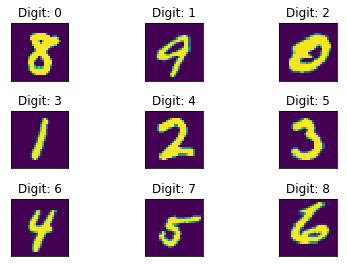

In [5]:
print_first_9(all_data[-9:])

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, UpSampling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
import math
import keras.backend as K

In [10]:
K.clear_session()

model = Sequential()

'''
Encoder:
'''
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

'''
Decoder:
'''
model.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(8, (3, 3),  padding='same', activation='relu'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Dropout(0.3))

'''
Output:
'''
model.add(Conv2D(1, (3, 3),  padding='same',activation='relu'))

optimizer = Adam(lr=10e-6)
model.compile(optimizer=optimizer,
              loss='mean_squared_error')

model.summary()

h = model.fit(X_train, X_train, batch_size=128, epochs=80, 
              verbose=1, validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           148       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 4)         0         
__________

In [0]:
test_encoded = model.predict(X_test)[:, :, :, 0]

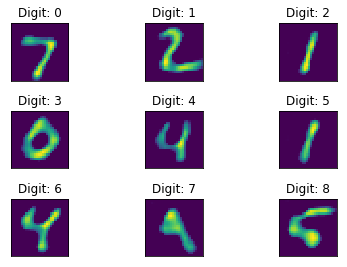

In [22]:
# View the auto-encoded data:
print_first_9(test_encoded)

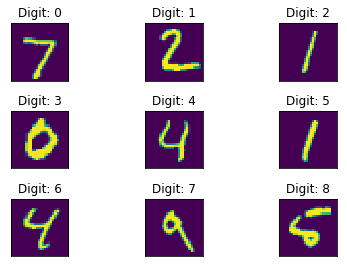

In [24]:
# View the real data:
print_first_9(X_test[:, :, :, 0])